<a href="https://colab.research.google.com/github/kruvcraft21/Learning-nlp-models/blob/master/Practice_nlp1_NLTK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> Материалы курса "Обработка естественного языка" </h1>

<h2> Практическое занятие № 1.2 </h2>

<h2> Тема: "Основы работы с библиотекой NLTK </h2>

[Все взято из оригинальной книжки по библиотеке NLTK](https://www.nltk.org/book/ch01.html)

**NLTK** — это свободно распространяемая библиотека Python, разработанная для работы с естественным языком. Это комплексный набор инструментов, предназначенный для символьной и статистической обработки естественного языка. Она предоставляет легкий доступ к более чем 50 корпусам текстов и лексическим ресурсам, таким как WordNet, а также набор инструментов для классификации, токенизации, стемминга, меток частей речи, синтаксического анализа и семантического рассуждения.

# Блок импорта и загрузки

Наша библиотека на сегодня

In [1]:
import nltk

import re

Будем также рисовать

In [2]:
import matplotlib.pyplot as plt

# Структура корпусов в NLTK

* `fileids()`	файлы корпуса
* `fileids([categories])`	файлы корпуса, соответствующие категориям `categories`
* `categories()`	категории корпуса
* `categories([fileids])`	категории корпуса, соответствующие файлам `fileids`
* `raw()`	необработанное содержимое корпуса
* `raw(fileids=[f1,f2,f3])`	необработанное содержимое указанных файлов
* `raw(categories=[c1,c2])`	необработанное содержимое указанных категорий
* `words()`	слова всего корпуса
* `words(fileids=[f1,f2,f3])`	слова указанных файлов
* `words(categories=[c1,c2])`	слова указанных категорий
* `sents()`	предложения всего корпуса
* `sents(fileids=[f1,f2,f3])`	предложения указанных файлов
* `sents(categories=[c1,c2])`	предложения указанных категорий
* `readme()`	содержимое файла README корпуса

**Поехали смотреть, что тут у нас есть**

# **Корпус Gutenberg**

NLTK включает небольшую подборку текстов из электронного текстового архива Project Gutenberg, который содержит около 25 000 бесплатных электронных книг, размещенных по адресу http://www.gutenberg.org/.

In [3]:
nltk.download('gutenberg')

[nltk_data] Downloading package gutenberg to /home/egor/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


True

In [4]:
from nltk.corpus import gutenberg

Смотрим на книжки

In [5]:
gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [6]:
gutenberg.readme()

'Project Gutenberg Selections\nhttp://gutenberg.net/\n\nThis corpus contains etexts from from Project Gutenberg,\nby the following authors:\n\n* Jane Austen (3)\n* William Blake (2)\n* Thornton W. Burgess\n* Sarah Cone Bryant\n* Lewis Carroll\n* G. K. Chesterton (3)\n* Maria Edgeworth\n* King James Bible\n* Herman Melville\n* John Milton\n* William Shakespeare (3)\n* Walt Whitman\n\nThe beginning of the body of each book could not be identified automatically,\nso the semi-generic header of each file has been removed, and included below.\nSome source files ended with a line "End of The Project Gutenberg Etext...",\nand this has been deleted.\n\nInformation about Project Gutenberg (one page)\n\nWe produce about two million dollars for each hour we work.  The\nfifty hours is one conservative estimate for how long it we take\nto get any etext selected, entered, proofread, edited, copyright\nsearched and analyzed, the copyright letters written, etc.  This\nprojected audience is one hundred 

Корпус с пунктуацией

In [7]:
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /home/egor/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /home/egor/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

**Немного базовой статистики по книгам**

* средняя длина слова (в буквах)
* средняя длина предложения (в словах)
* среднее количество раз, когда каждый элемент лексики встречается в тексте

`raw()` метод дает нам содержимое файла без какой-либо лингвистической обработки

`sents()` метод делит текст на предложения, где каждое предложение представляет собой список слов

In [8]:
for fileid in gutenberg.fileids():
     num_chars = len(gutenberg.raw(fileid))
     num_words = len(gutenberg.words(fileid))
     num_sents = len(gutenberg.sents(fileid))
     num_vocab = len(set(w.lower() for w in gutenberg.words(fileid)))
     print("В книге - {}, средняя длина слов {} букв; Всего слов: {}; Средняя длина предложения: {} слов; Количество уникальных слов: {}; Отдельное слово встречается в среднем {} раз".format(
          fileid,
          round(num_chars/num_words),
          num_words,
          round(num_words/num_sents),
          num_vocab,
          round(num_words/num_vocab))
)

В книге - austen-emma.txt, средняя длина слов 5 букв; Всего слов: 192427; Средняя длина предложения: 25 слов; Количество уникальных слов: 7344; Отдельное слово встречается в среднем 26 раз
В книге - austen-persuasion.txt, средняя длина слов 5 букв; Всего слов: 98171; Средняя длина предложения: 26 слов; Количество уникальных слов: 5835; Отдельное слово встречается в среднем 17 раз
В книге - austen-sense.txt, средняя длина слов 5 букв; Всего слов: 141576; Средняя длина предложения: 28 слов; Количество уникальных слов: 6403; Отдельное слово встречается в среднем 22 раз
В книге - bible-kjv.txt, средняя длина слов 4 букв; Всего слов: 1010654; Средняя длина предложения: 34 слов; Количество уникальных слов: 12767; Отдельное слово встречается в среднем 79 раз
В книге - blake-poems.txt, средняя длина слов 5 букв; Всего слов: 8354; Средняя длина предложения: 19 слов; Количество уникальных слов: 1535; Отдельное слово встречается в среднем 5 раз
В книге - bryant-stories.txt, средняя длина слов 4 б

**Допустим, мы хотим найти самое длинное предложение**



In [9]:
macbeth_sentences = gutenberg.sents('shakespeare-macbeth.txt')

longest_len = max(len(s) for s in macbeth_sentences)

[s for s in macbeth_sentences if len(s) == longest_len]

[['Doubtfull',
  'it',
  'stood',
  ',',
  'As',
  'two',
  'spent',
  'Swimmers',
  ',',
  'that',
  'doe',
  'cling',
  'together',
  ',',
  'And',
  'choake',
  'their',
  'Art',
  ':',
  'The',
  'mercilesse',
  'Macdonwald',
  '(',
  'Worthie',
  'to',
  'be',
  'a',
  'Rebell',
  ',',
  'for',
  'to',
  'that',
  'The',
  'multiplying',
  'Villanies',
  'of',
  'Nature',
  'Doe',
  'swarme',
  'vpon',
  'him',
  ')',
  'from',
  'the',
  'Westerne',
  'Isles',
  'Of',
  'Kernes',
  'and',
  'Gallowgrosses',
  'is',
  'supply',
  "'",
  'd',
  ',',
  'And',
  'Fortune',
  'on',
  'his',
  'damned',
  'Quarry',
  'smiling',
  ',',
  'Shew',
  "'",
  'd',
  'like',
  'a',
  'Rebells',
  'Whore',
  ':',
  'but',
  'all',
  "'",
  's',
  'too',
  'weake',
  ':',
  'For',
  'braue',
  'Macbeth',
  '(',
  'well',
  'hee',
  'deserues',
  'that',
  'Name',
  ')',
  'Disdayning',
  'Fortune',
  ',',
  'with',
  'his',
  'brandisht',
  'Steele',
  ',',
  'Which',
  'smoak',
  "'",
  'd',
 

**Поиск текста**

`concordance` показывает нам каждое вхождение данного слова вместе с некоторым контекстом

In [10]:
from nltk.text import Text

In [11]:
corpus_moby_dick = gutenberg.words('melville-moby_dick.txt')
text_moby_dick = Text(corpus_moby_dick)

In [12]:
text_moby_dick.concordance("monstrous", )

Displaying 11 of 11 matches:
ong the former , one was of a most monstrous size . ... This came towards us , 
ON OF THE PSALMS . " Touching that monstrous bulk of the whale or ork we have r
ll over with a heathenish array of monstrous clubs and spears . Some were thick
d as you gazed , and wondered what monstrous cannibal and savage could ever hav
that has survived the flood ; most monstrous and most mountainous ! That Himmal
they might scout at Moby Dick as a monstrous fable , or still worse and more de
th of Radney .'" CHAPTER 55 Of the Monstrous Pictures of Whales . I shall ere l
ing Scenes . In connexion with the monstrous pictures of whales , I am strongly
ere to enter upon those still more monstrous stories of them which are to be fo
ght have been rummaged out of this monstrous cabinet there is no telling . But 
of Whale - Bones ; for Whales of a monstrous size are oftentimes cast up dead u


**Можно находить похожие слова**

По контексту

In [13]:
text_moby_dick.similar("monstrous",)

true contemptible christian abundant few part mean careful puzzled
mystifying passing curious loving wise doleful gamesome singular
delightfully perilous fearless


In [14]:
text_moby_dick.concordance("contemptible" )

Displaying 4 of 4 matches:
, we shall find they will appear contemptible in the comparison . The whale is
 God ? Miserable man ! Oh ! most contemptible and worthy of all scorn ; with s
s these pig - fish are a noisy , contemptible set , mostly lurking in the mout
 harm , it may possibly be of no contemptible advantage ; considering that oil


In [15]:
text_moby_dick.common_contexts(["monstrous", "contemptible"])

most_and


Можно обмазаться метриками про "разноообразии лексики"

In [16]:
def lexical_diversity(text):
    return len(set(text)) / len(text)

In [17]:
lexical_diversity(text_moby_dick)

0.07406285585022564

**Задачки на поиск слов по условиям**

In [18]:
V = set(text_moby_dick)

In [19]:
long_words = [w for w in V if len(w) > 15]
sorted(long_words)

['CIRCUMNAVIGATION',
 'Physiognomically',
 'apprehensiveness',
 'cannibalistically',
 'characteristically',
 'circumnavigating',
 'circumnavigation',
 'circumnavigations',
 'comprehensiveness',
 'hermaphroditical',
 'indiscriminately',
 'indispensableness',
 'irresistibleness',
 'physiognomically',
 'preternaturalness',
 'responsibilities',
 'simultaneousness',
 'subterraneousness',
 'supernaturalness',
 'superstitiousness',
 'uncomfortableness',
 'uncompromisedness',
 'undiscriminating',
 'uninterpenetratingly']

FreqDist - строит оперативно встречаемость слов

In [20]:
from nltk.probability import FreqDist

In [21]:
fdist = FreqDist(text_moby_dick)
fdist

FreqDist({',': 18713, 'the': 13721, '.': 6862, 'of': 6536, 'and': 6024, 'a': 4569, 'to': 4542, ';': 4072, 'in': 3916, 'that': 2982, ...})

In [22]:
fdist.most_common(50)

[(',', 18713),
 ('the', 13721),
 ('.', 6862),
 ('of', 6536),
 ('and', 6024),
 ('a', 4569),
 ('to', 4542),
 (';', 4072),
 ('in', 3916),
 ('that', 2982),
 ("'", 2684),
 ('-', 2552),
 ('his', 2459),
 ('it', 2209),
 ('I', 2124),
 ('s', 1739),
 ('is', 1695),
 ('he', 1661),
 ('with', 1659),
 ('was', 1632),
 ('as', 1620),
 ('"', 1478),
 ('all', 1462),
 ('for', 1414),
 ('this', 1280),
 ('!', 1269),
 ('at', 1231),
 ('by', 1137),
 ('but', 1113),
 ('not', 1103),
 ('--', 1070),
 ('him', 1058),
 ('from', 1052),
 ('be', 1030),
 ('on', 1005),
 ('so', 918),
 ('whale', 906),
 ('one', 889),
 ('you', 841),
 ('had', 767),
 ('have', 760),
 ('there', 715),
 ('But', 705),
 ('or', 697),
 ('were', 680),
 ('now', 646),
 ('which', 640),
 ('?', 637),
 ('me', 627),
 ('like', 624)]

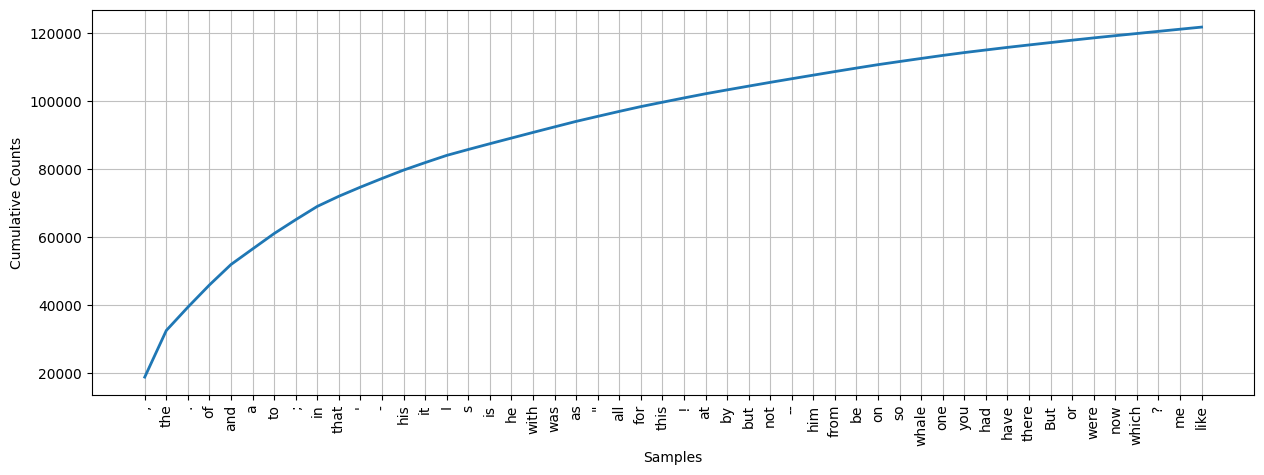

In [23]:
fig = plt.figure(figsize = (15,5))

fdist.plot(50, cumulative=True);

Специально есть метод про "встречается только 1 раз"

In [24]:
fdist.hapaxes()

['Herman',
 'Melville',
 ']',
 'ETYMOLOGY',
 'Late',
 'Consumptive',
 'School',
 'threadbare',
 'lexicons',
 'mockingly',
 'flags',
 'mortality',
 'signification',
 'HACKLUYT',
 'Sw',
 'HVAL',
 'roundness',
 'Dut',
 'Ger',
 'WALLEN',
 'WALW',
 'IAN',
 'RICHARDSON',
 'KETOS',
 'GREEK',
 'CETUS',
 'LATIN',
 'WHOEL',
 'ANGLO',
 'SAXON',
 'WAL',
 'HWAL',
 'SWEDISH',
 'ICELANDIC',
 'BALEINE',
 'BALLENA',
 'FEGEE',
 'ERROMANGOAN',
 'Librarian',
 'painstaking',
 'burrower',
 'grub',
 'Vaticans',
 'stalls',
 'higgledy',
 'piggledy',
 'gospel',
 'promiscuously',
 'commentator',
 'belongest',
 'sallow',
 'Pale',
 'Sherry',
 'loves',
 'bluntly',
 'Subs',
 'thankless',
 'Hampton',
 'Court',
 'hie',
 'refugees',
 'pampered',
 'Michael',
 'Raphael',
 'unsplinterable',
 'GENESIS',
 'JOB',
 'JONAH',
 'punish',
 'ISAIAH',
 'soever',
 'cometh',
 'incontinently',
 'perisheth',
 'PLUTARCH',
 'MORALS',
 'breedeth',
 'Whirlpooles',
 'Balaene',
 'arpens',
 'PLINY',
 'Scarcely',
 'TOOKE',
 'LUCIAN',
 'TRUE',


Совмещаем условия и делаем их сложными

In [25]:
sorted(w for w in set(text_moby_dick) if len(w) > 7 and fdist[w] > 50)

['Leviathan',
 'Nantucket',
 'Queequeg',
 'Starbuck',
 'Tashtego',
 'business',
 'harpooneer',
 'harpooneers',
 'peculiar',
 'something',
 'sometimes',
 'standing',
 'themselves',
 'therefore',
 'thousand',
 'together',
 'whalemen']

Ну или делаем статистику не только слов, но и чего-то еще

In [26]:
fdist_len = FreqDist(len(w) for w in text_moby_dick)
fdist_len

FreqDist({3: 50223, 1: 47933, 4: 42345, 2: 38513, 5: 26597, 6: 17111, 7: 14399, 8: 9966, 9: 6428, 10: 3528, ...})

In [27]:
fdist_len.most_common()

[(3, 50223),
 (1, 47933),
 (4, 42345),
 (2, 38513),
 (5, 26597),
 (6, 17111),
 (7, 14399),
 (8, 9966),
 (9, 6428),
 (10, 3528),
 (11, 1873),
 (12, 1053),
 (13, 567),
 (14, 177),
 (15, 70),
 (16, 22),
 (17, 12),
 (18, 1),
 (20, 1)]

## Обмажемся условиями по полной

In [28]:
sent = gutenberg.sents('melville-moby_dick.txt')[0]
sent

['[', 'Moby', 'Dick', 'by', 'Herman', 'Melville', '1851', ']']

In [29]:
[w for w in sent if len(w) < 4]

['[', 'by', ']']

In [30]:
[w for w in sent if len(w) <= 4]

['[', 'Moby', 'Dick', 'by', '1851', ']']

In [31]:
[w for w in sent if len(w) == 4]

['Moby', 'Dick', '1851']

In [32]:
[w for w in sent if len(w) != 4]

['[', 'by', 'Herman', 'Melville', ']']

Некоторые дополнительные условия



* `s.startswith(t)`	проверить, если `s` начинается с `t`

* `s.endswith(t)`	проверить, если `s` заканчивается на `t`

* `t in s`	проверить, если `t` является подстрокой `s`

* `s.islower()`	проверить, если `s` содержит символы в регистре, и все они в нижнем регистре

* `s.isupper()`	проверить, если `s` содержит символы в регистре, и все они в верхнем регистре

* `s.isalpha()`	проверить, если `s` непусто, и все символы в `s` являются буквенными

* `s.isalnum()`	проверить, если `s` непусто, и все символы в `s` являются буквенно-цифровыми

* `s.isdigit()`	проверить, если `s` непусто, и все символы в `s` являются цифрами

* `s.istitle()`	проверить, если `s` содержит символы в регистре и имеет заглавный регистр (т. е. все слова в `s` имеют начальные заглавные буквы)




In [33]:
sorted(w for w in set(text_moby_dick) if w.endswith('ableness'))

['comfortableness',
 'honourableness',
 'immutableness',
 'indispensableness',
 'indomitableness',
 'intolerableness',
 'palpableness',
 'reasonableness',
 'uncomfortableness']

In [34]:
sorted(term for term in set(text_moby_dick) if 'nost' in term)

['nostril', 'nostrils', 'unostentatious']

In [35]:
sorted(item for item in set(sent) if item.istitle())

['Dick', 'Herman', 'Melville', 'Moby']

In [36]:
sorted(item for item in set(sent) if item.isdigit())

['1851']

In [37]:
sorted(w for w in set(text_moby_dick) if 'z' in w and 'q' in w)

['Squeeze',
 'soliloquized',
 'soliloquizer',
 'soliloquizes',
 'soliloquizing',
 'squeeze',
 'squeezed',
 'squeezing',
 'tranquillize']

In [38]:
sorted(wd for wd in set(text_moby_dick) if wd.istitle() and len(wd) > 13)

['Bibliographical',
 'Circumambulate',
 'Congregational',
 'Constantinople',
 'Ehrenbreitstein',
 'Mephistophelean',
 'Philologically',
 'Physiognomically',
 'Tongatobooarrs']

In [39]:
sorted(w for w in set(sent) if not w.islower())

['1851', 'Dick', 'Herman', 'Melville', 'Moby', '[', ']']

In [40]:
sorted(t for t in set(text_moby_dick) if 'cie' in t or 'cei' in t)

['Glacier',
 'Receiving',
 'Science',
 'Sciences',
 'Societies',
 'Society',
 'agencies',
 'ancient',
 'ancientest',
 'ceiling',
 'conceit',
 'conceited',
 'conceits',
 'conceivable',
 'conceive',
 'conceived',
 'conceives',
 'conscience',
 'consciences',
 'conscientious',
 'conscientiously',
 'contingencies',
 'deceitfully',
 'deceitfulness',
 'deceits',
 'deceive',
 'deceived',
 'deceiving',
 'deficiencies',
 'deficiency',
 'efficiency',
 'efficient',
 'emergencies',
 'fancied',
 'fancies',
 'glacier',
 'insufficient',
 'intricacies',
 'omniscient',
 'omnisciently',
 'perceive',
 'perceived',
 'perceiving',
 'potencies',
 'prescience',
 'prescient',
 'prophecies',
 'receive',
 'received',
 'receives',
 'receiving',
 'science',
 'sciences',
 'scientific',
 'society',
 'species',
 'sufficient',
 'sufficiently',
 'unscientific',
 'vacancies']

# Корпус Brown

Первый электронный корпус английского языка объемом в миллион слов, созданный в 1961 году в Университете Брауна. Этот корпус содержит тексты из 500 источников, которые разбиты по жанрам.

In [41]:
nltk.download('brown')

[nltk_data] Downloading package brown to /home/egor/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


True

In [42]:
from nltk.corpus import brown

In [43]:
brown.categories()

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

Изучение систематических различий между жанрами, своего рода лингвистическое исследование, известное как стилистика.

  Давайте сравним жанры в использовании модальных глаголов.

In [44]:
cfd = nltk.ConditionalFreqDist(
          (genre, word)
          for genre in brown.categories()
          for word in brown.words(categories=genre))

In [45]:
genres = ['news', 'religion', 'hobbies', 'science_fiction', 'romance', 'humor']
modals = ['can', 'could', 'may', 'might', 'must', 'will']
cfd.tabulate(conditions=genres, samples=modals)

                  can could   may might  must  will 
           news    93    86    66    38    50   389 
       religion    82    59    78    12    54    71 
        hobbies   268    58   131    22    83   264 
science_fiction    16    49     4    12     8    16 
        romance    74   193    11    51    45    43 
          humor    16    30     8     8     9    13 


Дополнительные сведения о Conditional Frequency

* `cfdist = ConditionalFreqDist(pairs)`	создать условное частотное распределение для списка `pairs`
* `cfdist.conditions()`	условия
* `cfdist[condition]`	частотное распределение для этого условия
* `cfdist[condition][sample]`	частота для данного образца для этого условия
* `cfdist.tabulate()`	свести в таблицу условное частотное распределение
* `cfdist.tabulate(samples, conditions)`	табулирование ограничено указанными образцами и условиями
* `cfdist.plot()`	график условного распределения частот
* `cfdist.plot(samples, conditions)`	графическое изображение, ограниченное указанными образцами и условиями
* `cfdist1 < cfdist2`	проверить, если образцы в `cfdist1` встречаются реже, чем в `cfdist2`

# **Корпус про Речь Президентов США**

In [46]:
nltk.download('inaugural')

[nltk_data] Downloading package inaugural to /home/egor/nltk_data...
[nltk_data]   Unzipping corpora/inaugural.zip.


True

In [47]:
from nltk.corpus import inaugural

In [48]:
inaugural.fileids()

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

Есть и Байден, и Трамп. Кайф

**Dispersion plot**

Каждая полоса представляет собой экземпляр слова, а каждая строка представляет собой весь текст.

In [49]:
corpus_inaugural = inaugural.words()
text_inaugural = Text(corpus_inaugural)

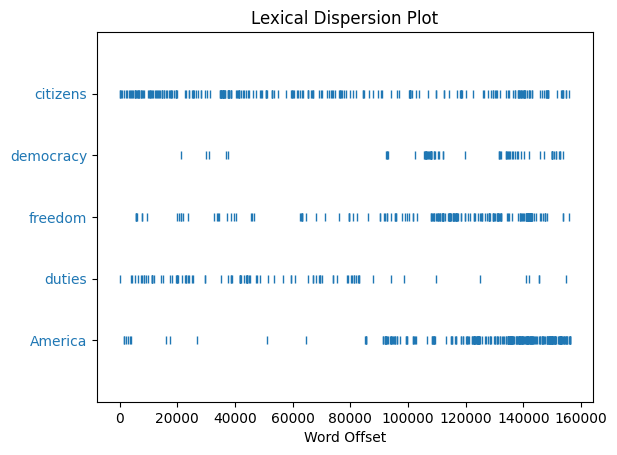

In [50]:
text_inaugural.dispersion_plot(["citizens", "democracy", "freedom", "duties", "America"]    );

Ну или можно поиграться с условными вероятностями

In [51]:
[re.match(r'\d+', fileid).group()  for fileid in inaugural.fileids()];

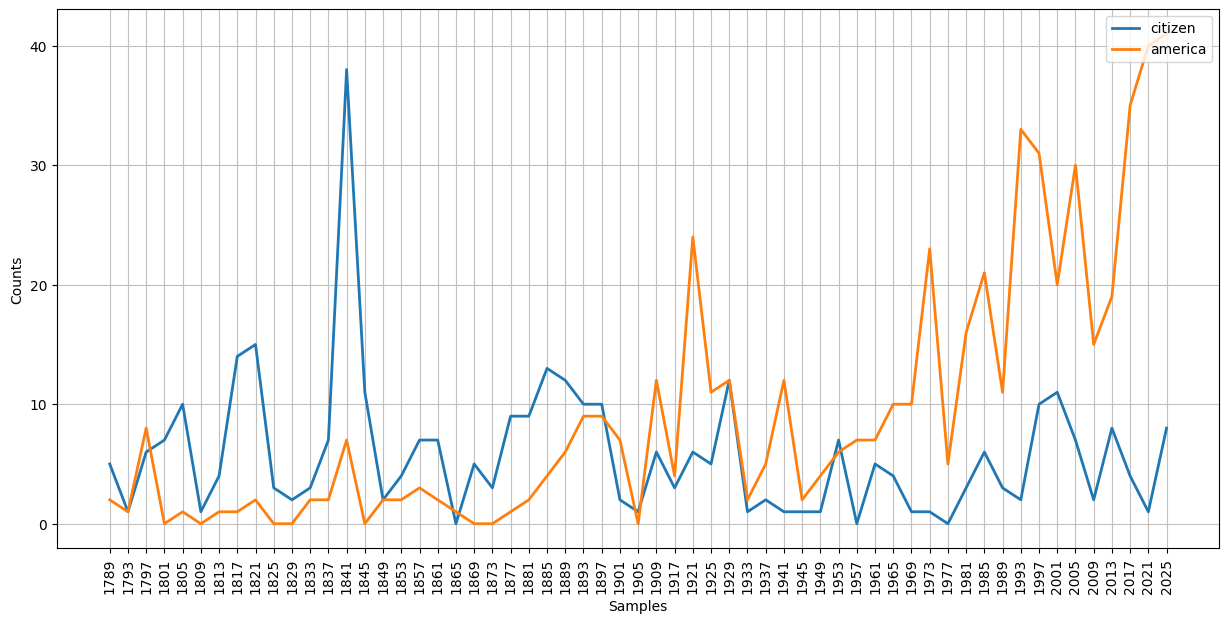

In [52]:
cfd = nltk.ConditionalFreqDist(
           (target, re.match(fr'\d+', fileid).group())
           for fileid in inaugural.fileids()
           for w in inaugural.words(fileid)
           for target in ['america', 'citizen']
           if w.lower().startswith(target))

fig = plt.figure(figsize = (15,7))
cfd.plot();

#  Прочие Лексические Ресурсы

**Корпус Wordlist**

NLTK включает в себя несколько корпусов, которые представляют собой не что иное, как списки слов. Корпус Words — это файл /usr/share/dict/words из Unix, используемый некоторыми программами проверки орфографии.

Мы можем использовать его для поиска необычных или неправильно написанных слов в текстовом корпусе.

In [53]:
nltk.download('words')

[nltk_data] Downloading package words to /home/egor/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [54]:
nltk.corpus.words.words()

['A',
 'a',
 'aa',
 'aal',
 'aalii',
 'aam',
 'Aani',
 'aardvark',
 'aardwolf',
 'Aaron',
 'Aaronic',
 'Aaronical',
 'Aaronite',
 'Aaronitic',
 'Aaru',
 'Ab',
 'aba',
 'Ababdeh',
 'Ababua',
 'abac',
 'abaca',
 'abacate',
 'abacay',
 'abacinate',
 'abacination',
 'abaciscus',
 'abacist',
 'aback',
 'abactinal',
 'abactinally',
 'abaction',
 'abactor',
 'abaculus',
 'abacus',
 'Abadite',
 'abaff',
 'abaft',
 'abaisance',
 'abaiser',
 'abaissed',
 'abalienate',
 'abalienation',
 'abalone',
 'Abama',
 'abampere',
 'abandon',
 'abandonable',
 'abandoned',
 'abandonedly',
 'abandonee',
 'abandoner',
 'abandonment',
 'Abanic',
 'Abantes',
 'abaptiston',
 'Abarambo',
 'Abaris',
 'abarthrosis',
 'abarticular',
 'abarticulation',
 'abas',
 'abase',
 'abased',
 'abasedly',
 'abasedness',
 'abasement',
 'abaser',
 'Abasgi',
 'abash',
 'abashed',
 'abashedly',
 'abashedness',
 'abashless',
 'abashlessly',
 'abashment',
 'abasia',
 'abasic',
 'abask',
 'Abassin',
 'abastardize',
 'abatable',
 'abate

In [55]:
def unusual_words(text):
    text_vocab = set(w.lower() for w in text if w.isalpha())
    english_vocab = set(w.lower() for w in nltk.corpus.words.words())
    unusual = text_vocab - english_vocab
    return sorted(unusual)

In [56]:
unusual_words(nltk.corpus.gutenberg.words('austen-sense.txt'))

['abbeyland',
 'abhorred',
 'abilities',
 'abounded',
 'abridgement',
 'abused',
 'abuses',
 'accents',
 'accepting',
 'accommodations',
 'accompanied',
 'accounted',
 'accounts',
 'accustomary',
 'aches',
 'acknowledging',
 'acknowledgment',
 'acknowledgments',
 'acquaintances',
 'acquiesced',
 'acquitted',
 'acquitting',
 'acted',
 'actions',
 'adapted',
 'adding',
 'additions',
 'addressed',
 'addresses',
 'addressing',
 'adhering',
 'adieus',
 'adjusting',
 'administering',
 'admirers',
 'admires',
 'admitting',
 'adorned',
 'advances',
 'advantages',
 'affairs',
 'affections',
 'affects',
 'affixed',
 'afflictions',
 'afforded',
 'affording',
 'ages',
 'agitated',
 'agonies',
 'ailments',
 'aimed',
 'alarms',
 'alienated',
 'alighted',
 'alleged',
 'allenham',
 'allowances',
 'allowed',
 'allowing',
 'alluded',
 'alterations',
 'altered',
 'altering',
 'amended',
 'amounted',
 'amusements',
 'ankles',
 'annamaria',
 'annexed',
 'announced',
 'announcing',
 'annuities',
 'annum',
 

**Стоп-слова**

высокочастотные слова, такие как «the», «to» и «также», которые мы иногда хотим отфильтровать из документа перед дальнейшей обработкой. Стоп-слова обычно имеют небольшое лексическое содержание, и их присутствие в тексте не отличает его от других текстов.

In [57]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/egor/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [58]:
from nltk.corpus import stopwords

In [59]:
stopwords.fileids()

['albanian',
 'arabic',
 'azerbaijani',
 'basque',
 'belarusian',
 'bengali',
 'catalan',
 'chinese',
 'danish',
 'dutch',
 'english',
 'finnish',
 'french',
 'german',
 'greek',
 'hebrew',
 'hinglish',
 'hungarian',
 'indonesian',
 'italian',
 'kazakh',
 'nepali',
 'norwegian',
 'portuguese',
 'romanian',
 'russian',
 'slovene',
 'spanish',
 'swedish',
 'tajik',
 'tamil',
 'turkish']

In [60]:
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [61]:
stopwords.words('russian')

['и',
 'в',
 'во',
 'не',
 'что',
 'он',
 'на',
 'я',
 'с',
 'со',
 'как',
 'а',
 'то',
 'все',
 'она',
 'так',
 'его',
 'но',
 'да',
 'ты',
 'к',
 'у',
 'же',
 'вы',
 'за',
 'бы',
 'по',
 'только',
 'ее',
 'мне',
 'было',
 'вот',
 'от',
 'меня',
 'еще',
 'нет',
 'о',
 'из',
 'ему',
 'теперь',
 'когда',
 'даже',
 'ну',
 'вдруг',
 'ли',
 'если',
 'уже',
 'или',
 'ни',
 'быть',
 'был',
 'него',
 'до',
 'вас',
 'нибудь',
 'опять',
 'уж',
 'вам',
 'ведь',
 'там',
 'потом',
 'себя',
 'ничего',
 'ей',
 'может',
 'они',
 'тут',
 'где',
 'есть',
 'надо',
 'ней',
 'для',
 'мы',
 'тебя',
 'их',
 'чем',
 'была',
 'сам',
 'чтоб',
 'без',
 'будто',
 'чего',
 'раз',
 'тоже',
 'себе',
 'под',
 'будет',
 'ж',
 'тогда',
 'кто',
 'этот',
 'того',
 'потому',
 'этого',
 'какой',
 'совсем',
 'ним',
 'здесь',
 'этом',
 'один',
 'почти',
 'мой',
 'тем',
 'чтобы',
 'нее',
 'сейчас',
 'были',
 'куда',
 'зачем',
 'всех',
 'никогда',
 'можно',
 'при',
 'наконец',
 'два',
 'об',
 'другой',
 'хоть',
 'после',
 'на

**Сочетание** (**collocation**) – это последовательность слов, которые необычно часто встречаются вместе.

In [62]:
text_inaugural.collocations()

United States; fellow citizens; years ago; four years; Federal
Government; General Government; Vice President; American people; God
bless; Chief Justice; one another; fellow Americans; Old World;
Almighty God; Fellow citizens; Chief Magistrate; every citizen; Indian
tribes; public debt; foreign nations


In [63]:
text_moby_dick.collocations()

Sperm Whale; Moby Dick; White Whale; old man; Captain Ahab; sperm
whale; Right Whale; Captain Peleg; New Bedford; Cape Horn; cried Ahab;
years ago; lower jaw; never mind; Father Mapple; cried Stubb; chief
mate; white whale; ivory leg; one hand


# Странная игра в слова

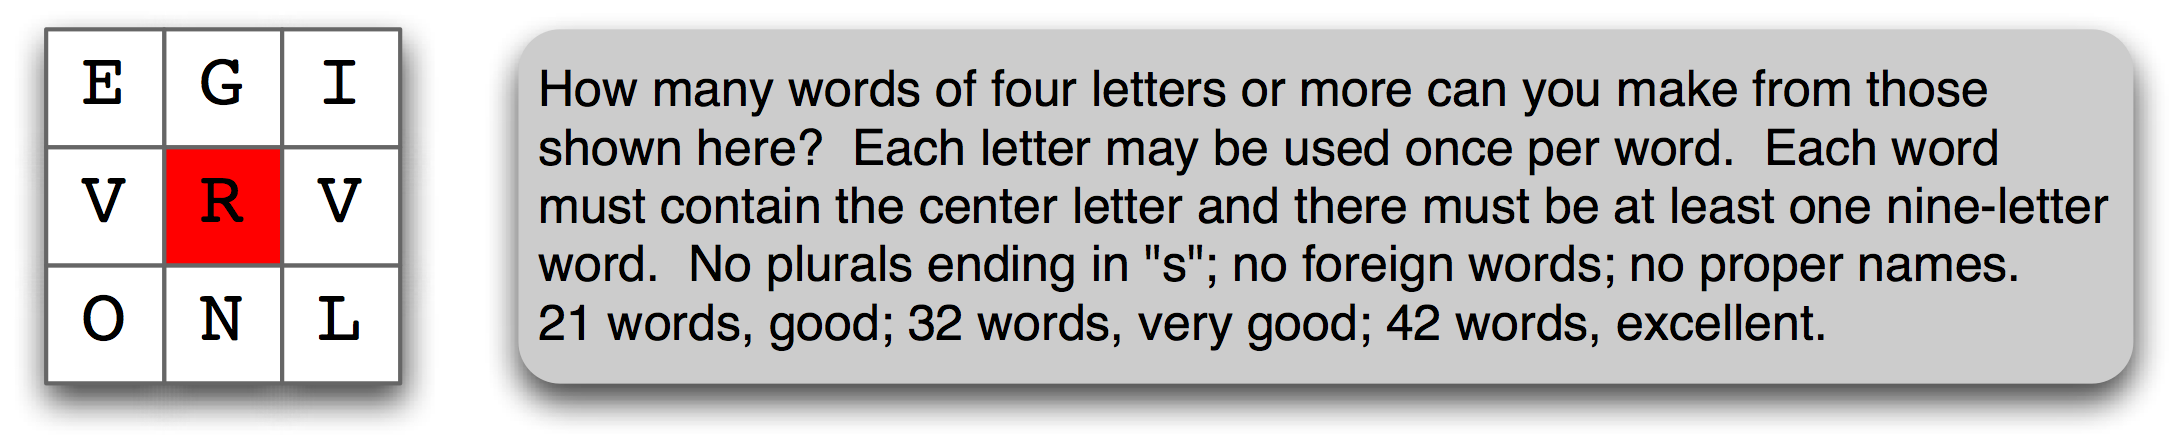

In [64]:
puzzle_letters = nltk.FreqDist('egivrvonl')

obligatory = 'r'

wordlist = nltk.corpus.words.words()

Посмотри 6-буквенные ответы

In [65]:
[w for w in wordlist if len(w) >= 6
 and obligatory in w
 and nltk.FreqDist(w) <= puzzle_letters]

['glover',
 'gorlin',
 'govern',
 'grovel',
 'ignore',
 'involver',
 'lienor',
 'linger',
 'longer',
 'lovering',
 'noiler',
 'overling',
 'region',
 'renvoi',
 'revolving',
 'ringle',
 'roving',
 'violer',
 'virole']

# Корпус Имен

In [66]:
nltk.download('names')

[nltk_data] Downloading package names to /home/egor/nltk_data...
[nltk_data]   Unzipping corpora/names.zip.


True

In [67]:
names = nltk.corpus.names
names.fileids()

['female.txt', 'male.txt']

In [68]:
male_names = names.words('male.txt')
female_names = names.words('female.txt')

Статистика встречаемости последних букв в именах (почему бы и нет)

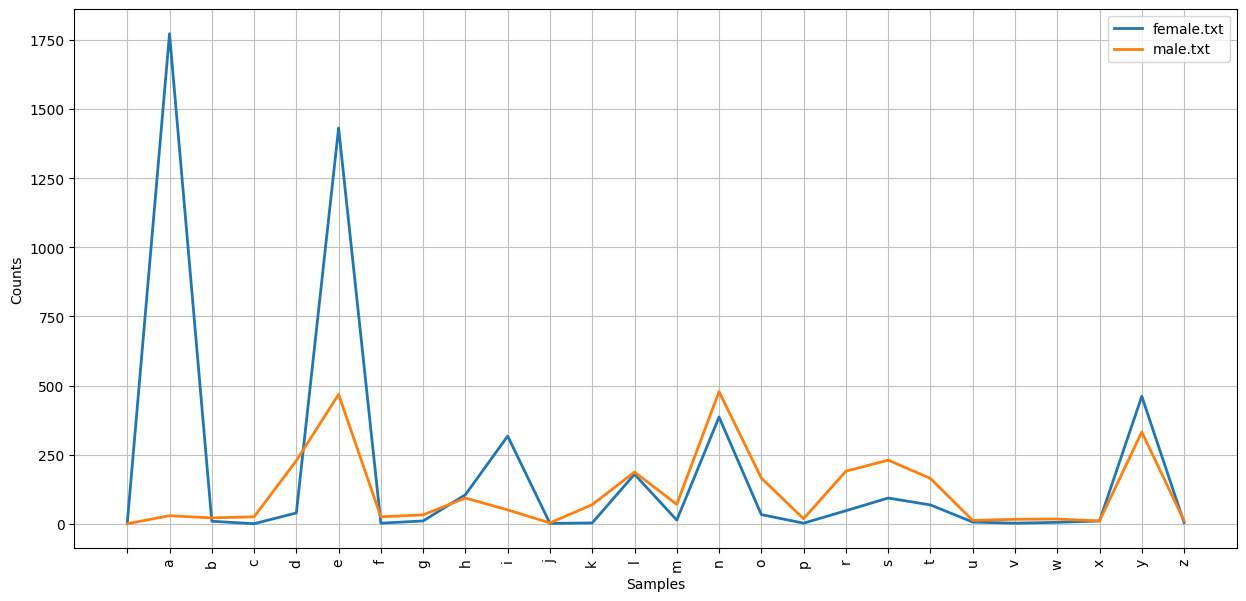

In [69]:
fig = plt.figure(figsize = (15,7))

cfd = nltk.ConditionalFreqDist(
           (fileid, name[-1])
           for fileid in names.fileids()
           for name in names.words(fileid))
cfd.plot();

#  **WordNet**

**WordNet** — это лексическая база данных английского языка, разработанная в Принстонском университете и выпущенная вместе с сопутствующим программным обеспечением под не копилефтной свободной лицензией. Представляет собой электронный словарь-тезаурус и набор семантических сетей для английского языка.

**OMW (The Open Multilingual Wordnet)** - чтение , валидация и поиск по базе wordnet.

In [70]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /home/egor/nltk_data...
[nltk_data] Downloading package omw-1.4 to /home/egor/nltk_data...


True

In [71]:
from nltk.corpus import wordnet as wn

synset или «набор синонимов», набор синонимичных слов (или «лемм»)

In [72]:
wn.synsets('motorcar')

[Synset('car.n.01')]

In [73]:
wn.synsets('automobile')

[Synset('car.n.01'), Synset('automobile.v.01')]

In [74]:
wn.synset('car.n.01').lemma_names()

['car', 'auto', 'automobile', 'machine', 'motorcar']

In [75]:
wn.synset('car.n.01').definition()

'a motor vehicle with four wheels; usually propelled by an internal combustion engine'

In [76]:
wn.synset('car.n.01').examples()

['he needs a car to get to work']

Для многозначных слов

In [77]:
wn.synsets('car')

[Synset('car.n.01'),
 Synset('car.n.02'),
 Synset('car.n.03'),
 Synset('car.n.04'),
 Synset('cable_car.n.01')]

In [78]:
for synset in wn.synsets('car'):
    print(synset, synset.definition())
    print('\n')

Synset('car.n.01') a motor vehicle with four wheels; usually propelled by an internal combustion engine


Synset('car.n.02') a wheeled vehicle adapted to the rails of railroad


Synset('car.n.03') the compartment that is suspended from an airship and that carries personnel and the cargo and the power plant


Synset('car.n.04') where passengers ride up and down


Synset('cable_car.n.01') a conveyance for passengers or freight on a cable railway




In [79]:
for synset in wn.synsets('car'):
    print(synset.lemma_names())

['car', 'auto', 'automobile', 'machine', 'motorcar']
['car', 'railcar', 'railway_car', 'railroad_car']
['car', 'gondola']
['car', 'elevator_car']
['cable_car', 'car']


In [80]:
wn.lemmas('car')

[Lemma('car.n.01.car'),
 Lemma('car.n.02.car'),
 Lemma('car.n.03.car'),
 Lemma('car.n.04.car'),
 Lemma('cable_car.n.01.car')]

**The WordNet Hierarchy**

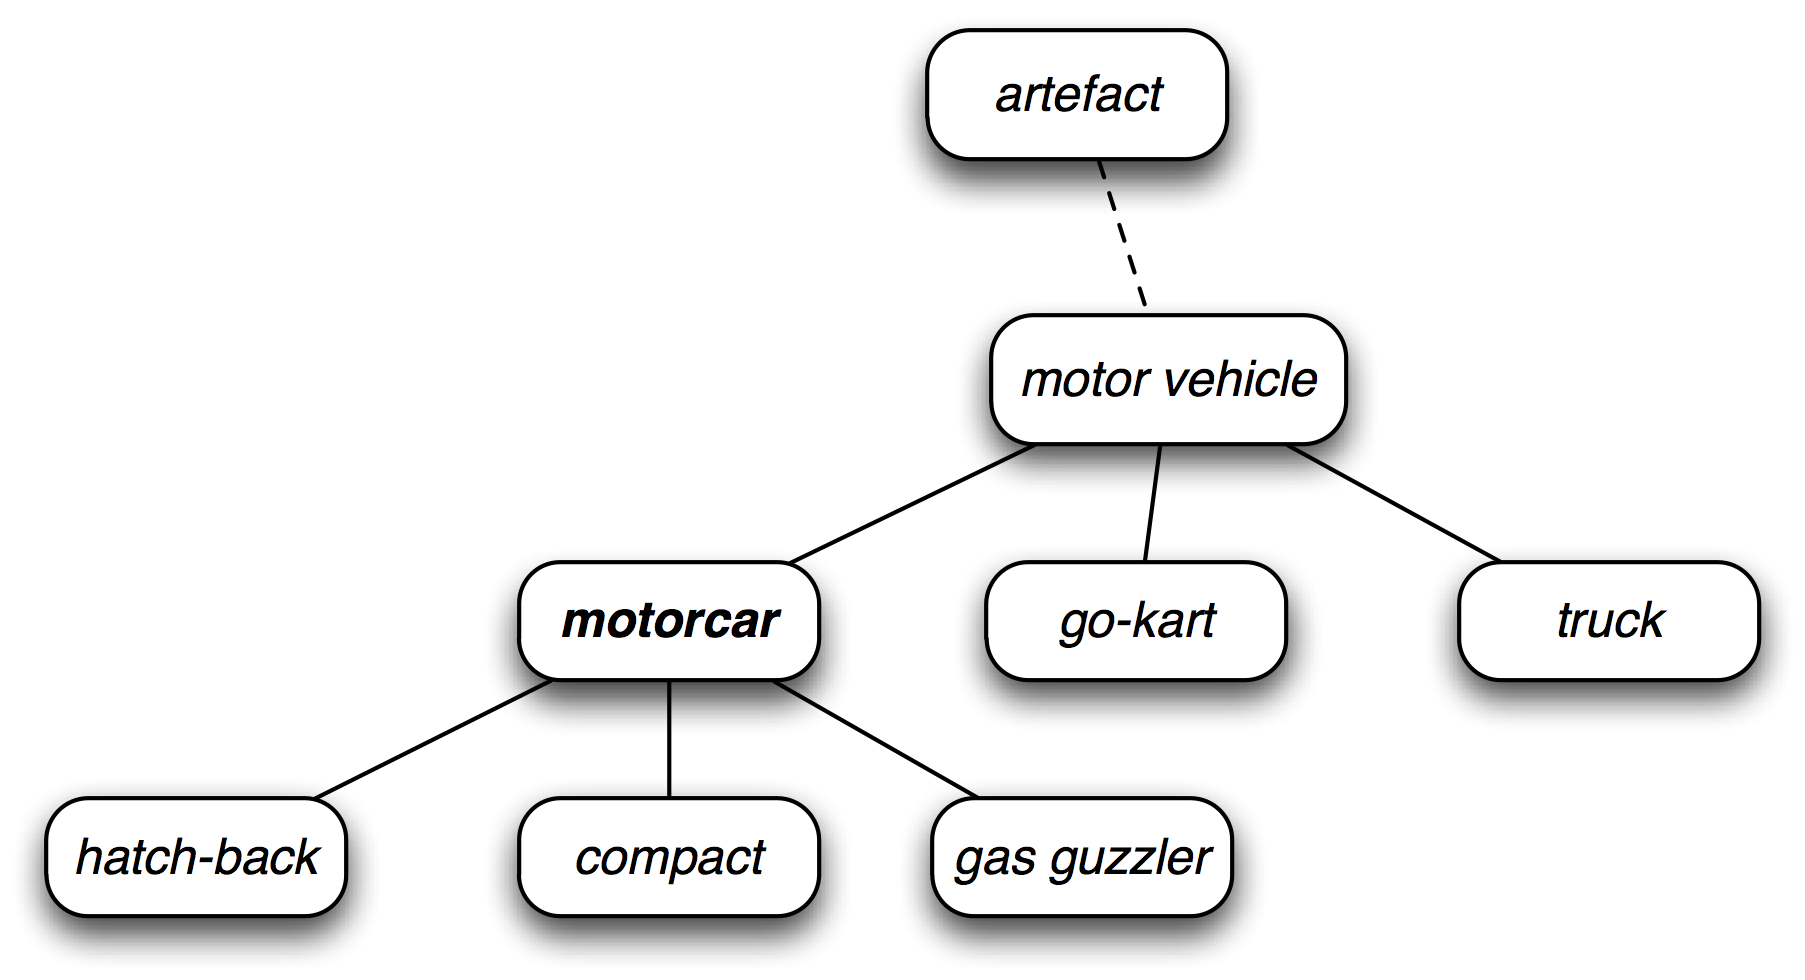

Гипонимы (`hyponyms`) - вниз по дереву WordNet

In [81]:
motorcar = wn.synset('car.n.01')
types_of_motorcar = motorcar.hyponyms()
types_of_motorcar

[Synset('loaner.n.02'),
 Synset('minicar.n.01'),
 Synset('compact.n.03'),
 Synset('hot_rod.n.01'),
 Synset('cruiser.n.01'),
 Synset('hatchback.n.01'),
 Synset('sedan.n.01'),
 Synset('stock_car.n.01'),
 Synset('sports_car.n.01'),
 Synset('racer.n.02'),
 Synset('hardtop.n.01'),
 Synset('model_t.n.01'),
 Synset('cab.n.03'),
 Synset('minivan.n.01'),
 Synset('limousine.n.01'),
 Synset('used-car.n.01'),
 Synset('bus.n.04'),
 Synset('horseless_carriage.n.01'),
 Synset('sport_utility.n.01'),
 Synset('ambulance.n.01'),
 Synset('roadster.n.01'),
 Synset('convertible.n.01'),
 Synset('subcompact.n.01'),
 Synset('touring_car.n.01'),
 Synset('gas_guzzler.n.01'),
 Synset('coupe.n.01'),
 Synset('pace_car.n.01'),
 Synset('beach_wagon.n.01'),
 Synset('stanley_steamer.n.01'),
 Synset('jeep.n.01'),
 Synset('electric.n.01')]

Ну или в виде лемм

In [82]:
sorted(lemma.name() for synset in types_of_motorcar for lemma in synset.lemmas())

['Model_T',
 'S.U.V.',
 'SUV',
 'Stanley_Steamer',
 'ambulance',
 'beach_waggon',
 'beach_wagon',
 'bus',
 'cab',
 'compact',
 'compact_car',
 'convertible',
 'coupe',
 'cruiser',
 'electric',
 'electric_automobile',
 'electric_car',
 'estate_car',
 'gas_guzzler',
 'hack',
 'hardtop',
 'hatchback',
 'heap',
 'horseless_carriage',
 'hot-rod',
 'hot_rod',
 'jalopy',
 'jeep',
 'landrover',
 'limo',
 'limousine',
 'loaner',
 'minicar',
 'minivan',
 'pace_car',
 'patrol_car',
 'phaeton',
 'police_car',
 'police_cruiser',
 'prowl_car',
 'race_car',
 'racer',
 'racing_car',
 'roadster',
 'runabout',
 'saloon',
 'secondhand_car',
 'sedan',
 'sport_car',
 'sport_utility',
 'sport_utility_vehicle',
 'sports_car',
 'squad_car',
 'station_waggon',
 'station_wagon',
 'stock_car',
 'subcompact',
 'subcompact_car',
 'taxi',
 'taxicab',
 'tourer',
 'touring_car',
 'two-seater',
 'used-car',
 'waggon',
 'wagon']

Гиперонимы (`hypernym_paths`) - вверх по дереву WordNet

In [83]:
paths = motorcar.hypernym_paths()
paths

[[Synset('entity.n.01'),
  Synset('physical_entity.n.01'),
  Synset('object.n.01'),
  Synset('whole.n.02'),
  Synset('artifact.n.01'),
  Synset('instrumentality.n.03'),
  Synset('container.n.01'),
  Synset('wheeled_vehicle.n.01'),
  Synset('self-propelled_vehicle.n.01'),
  Synset('motor_vehicle.n.01'),
  Synset('car.n.01')],
 [Synset('entity.n.01'),
  Synset('physical_entity.n.01'),
  Synset('object.n.01'),
  Synset('whole.n.02'),
  Synset('artifact.n.01'),
  Synset('instrumentality.n.03'),
  Synset('conveyance.n.03'),
  Synset('vehicle.n.01'),
  Synset('wheeled_vehicle.n.01'),
  Synset('self-propelled_vehicle.n.01'),
  Synset('motor_vehicle.n.01'),
  Synset('car.n.01')]]

Есть два пути...

In [84]:
[synset.name() for synset in paths[0]]

['entity.n.01',
 'physical_entity.n.01',
 'object.n.01',
 'whole.n.02',
 'artifact.n.01',
 'instrumentality.n.03',
 'container.n.01',
 'wheeled_vehicle.n.01',
 'self-propelled_vehicle.n.01',
 'motor_vehicle.n.01',
 'car.n.01']

In [85]:
[synset.name() for synset in paths[1]]

['entity.n.01',
 'physical_entity.n.01',
 'object.n.01',
 'whole.n.02',
 'artifact.n.01',
 'instrumentality.n.03',
 'conveyance.n.03',
 'vehicle.n.01',
 'wheeled_vehicle.n.01',
 'self-propelled_vehicle.n.01',
 'motor_vehicle.n.01',
 'car.n.01']

Общий "корень"

In [86]:
motorcar.root_hypernyms()

[Synset('entity.n.01')]

# Больше лексических отношений

от предметов к их компонентам (**меронимы**) или к вещам, в которых они содержатся (**холонимы**)

Например, частями «дерева» являются его «ствол», «крона» и т. д.;

In [87]:
wn.synset('tree.n.01').part_meronyms()

[Synset('stump.n.01'),
 Synset('crown.n.07'),
 Synset('burl.n.02'),
 Synset('trunk.n.01'),
 Synset('limb.n.02')]

Вещество, из которого состоит «дерево», включает «сердцевину» и «заболонь»

In [88]:
wn.synset('tree.n.01').substance_meronyms()

[Synset('heartwood.n.01'), Synset('sapwood.n.01')]

Совокупность «деревьев» образует «лес»;

In [89]:
wn.synset('tree.n.01').member_holonyms()

[Synset('forest.n.01')]

рассмотрим слово мята, которое имеет несколько тесно связанных значений.

Мы видим, что mint.n.04 является частью mint.n.02 и веществом, из которого сделан mint.n.05.

In [90]:
for synset in wn.synsets('mint', wn.NOUN):
    print(synset.name() + ':', synset.definition())

batch.n.02: (often followed by `of') a large number or amount or extent
mint.n.02: any north temperate plant of the genus Mentha with aromatic leaves and small mauve flowers
mint.n.03: any member of the mint family of plants
mint.n.04: the leaves of a mint plant used fresh or candied
mint.n.05: a candy that is flavored with a mint oil
mint.n.06: a plant where money is coined by authority of the government


Существуют также отношения между глаголами. Например, акт ходьбы включает в себя акт шагания, поэтому ходьба влечет за собой шагание. Некоторые глаголы имеют несколько следствий:

In [91]:
wn.synset('walk.v.01').entailments()

[Synset('step.v.01')]

In [92]:
wn.synset('eat.v.01').entailments()

[Synset('swallow.v.01'), Synset('chew.v.01')]

In [93]:
wn.synset('tease.v.03').entailments()

[Synset('disappoint.v.01'), Synset('arouse.v.07')]

Между леммами существуют некоторые лексические отношения, например, антонимия:

In [94]:
wn.lemma('supply.n.02.supply').antonyms()

[Lemma('demand.n.02.demand')]

In [95]:
wn.lemma('rush.v.01.rush').antonyms()

[Lemma('linger.v.04.linger')]

In [96]:
wn.lemma('horizontal.a.01.horizontal').antonyms()

[Lemma('vertical.a.01.vertical'), Lemma('inclined.a.02.inclined')]

In [97]:
wn.lemma('staccato.r.01.staccato').antonyms()

[Lemma('legato.r.01.legato')]

In [98]:
wn.synset('staccato.r.01').definition()

'separating the notes; in music'

In [99]:
wn.synset('legato.r.01').definition()

'connecting the notes; in music'

# Семантическое сходство

In [100]:
right = wn.synset('right_whale.n.01')
orca = wn.synset('orca.n.01')
minke = wn.synset('minke_whale.n.01')
tortoise = wn.synset('tortoise.n.01')
novel = wn.synset('novel.n.01')

In [101]:
right.lowest_common_hypernyms(minke)

[Synset('baleen_whale.n.01')]

In [102]:
right.lowest_common_hypernyms(orca)

[Synset('whale.n.02')]

In [103]:
right.lowest_common_hypernyms(tortoise)

[Synset('vertebrate.n.01')]

In [104]:
right.lowest_common_hypernyms(novel)

[Synset('entity.n.01')]

**Меры подобия**

In [105]:
right.path_similarity(minke)

0.25

In [106]:
right.path_similarity(orca)

0.16666666666666666

In [107]:
right.path_similarity(tortoise)

0.07692307692307693

In [108]:
right.path_similarity(novel)

0.043478260869565216

# Про Биграммы и прочее

In [109]:
from nltk.util import bigrams

In [110]:
list(bigrams(inaugural.sents()[0]))

[('Fellow', '-'),
 ('-', 'Citizens'),
 ('Citizens', 'of'),
 ('of', 'the'),
 ('the', 'Senate'),
 ('Senate', 'and'),
 ('and', 'of'),
 ('of', 'the'),
 ('the', 'House'),
 ('House', 'of'),
 ('of', 'Representatives'),
 ('Representatives', ':')]

# Веселое

In [111]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/egor/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Здесь используются Три-граммы

In [112]:
generation = text_inaugural.generate(random_seed = 322,
                                     length = 50)

Building ngram index...


the safe - keeping and disbursement of the industrious poor . power
regulates the destiny of the success which we pass . little solidity
in an eminent degree by questions of difference should at least to
whom we salute for his half - slave clause of the whole of our


In [113]:
generation

'the safe - keeping and disbursement of the industrious poor . power\nregulates the destiny of the success which we pass . little solidity\nin an eminent degree by questions of difference should at least to\nwhom we salute for his half - slave clause of the whole of our'

# Задания

**1)** Создайте dispersion plot четырех главных героев в Sense and Sensibility: Elinor, Marianne, Edward, и Willoughby.

Что вы можете сказать о разных ролях, сыгранных мужчинами и женщинами в этом романе?

  Можете ли вы идентифицировать пары?

In [114]:
# напишите свой код здесь

**2)** Используя механизм `ConditionalFreqDist` оцените встречаемость вопросительных слов  (**wh** words,  `what`, `when`, `where`, `who`, и `why`) в корпусе Brown.

In [115]:
# напишите свой код здесь

**3)** Корпус про речь президентов

1.   Получите список стран, которые появляются в Корпусе (получите список слов в заглавных буквах и выберите из него вручную)
2.   Отслеживайте их появление на протяжении лет

In [116]:
# напишите свой код здесь

**4)** Используя `.index()` найдите слово `crown` в тексте `'shakespeare-hamlet.txt'`

Методом проб и ошибок найдите фрагмент полного предложения, содержащего это слово.

In [117]:
# напишите свой код здесь

**5)** Напишите программу, которая печатает 50 наиболее часто встречающихся биграмм (пар смежных слов) текста, пропуская биграммы, содержащие стоп-слова. Корпус текста - на ваш выбор

In [118]:
# напишите свой код здесь

**6)** Исследуйте отношения холоним-мероним для некоторых существительных. Лучше в виде функции

Помните, что существует три вида отношения холоним-мероним, поэтому вам нужно использовать: `member_meronyms()`, `part_meronyms()`, `substance_meronyms()`, `member_holonyms()`, `part_holonyms()`, и `substance_holonyms()`.

In [119]:
# напишите свой код здесь

**7)** Напишите функцию `supergloss(s)` которая принимает в качестве аргумента синсет `s` и возвращает строку, состоящую из конкатенации определения `s` и определений всех гиперонимов и гипонимов `s`

In [120]:
# напишите свой код здесь

**8)** Напишите функцию `word_freq()`, которая принимает слово и название раздела корпуса Brown  в качестве аргументов и вычисляет частоту слова в этом разделе корпуса

In [121]:
# напишите свой код здесь

**9)** Определите условное частотное распределение по корпусу `Names`, которое позволит вам увидеть, какие начальные буквы чаще встречаются у мужчин, а какие у женщин.



In [122]:
# напишите свой код здесь

**10)** Найдите появления и контекст для следующего списка текстов и слов

*   **текст** `Sense and Sensibility` - **слово** `affection`
*   **текст** `book of Genesis` - **слово** `lived`
*   **текст** `Inaugural Address Corpus` - **слова** `nation`, `terror`, `god`
*   **текст** `NPS Chat Corpus` - **слова** `im`, `ur`, `lol`

In [123]:
# напишите свой код здесь

**11)** Попробуйте сгенерировать текст основываясь на других первоисточниках. Используйте разные random_seed

In [124]:
# напишите свой код здесь